<a href="https://colab.research.google.com/github/Raghava-1845/NNDL-6/blob/main/tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brain-tumor-mri-dataset' dataset.
Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


In [13]:
!pip install kagglehub tensorflow

Saving Tr-pi_1337.jpg to Tr-pi_1337 (3).jpg
Saving Tr-no_1590.jpg to Tr-no_1590.jpg
Saving Tr-me_1233.jpg to Tr-me_1233.jpg


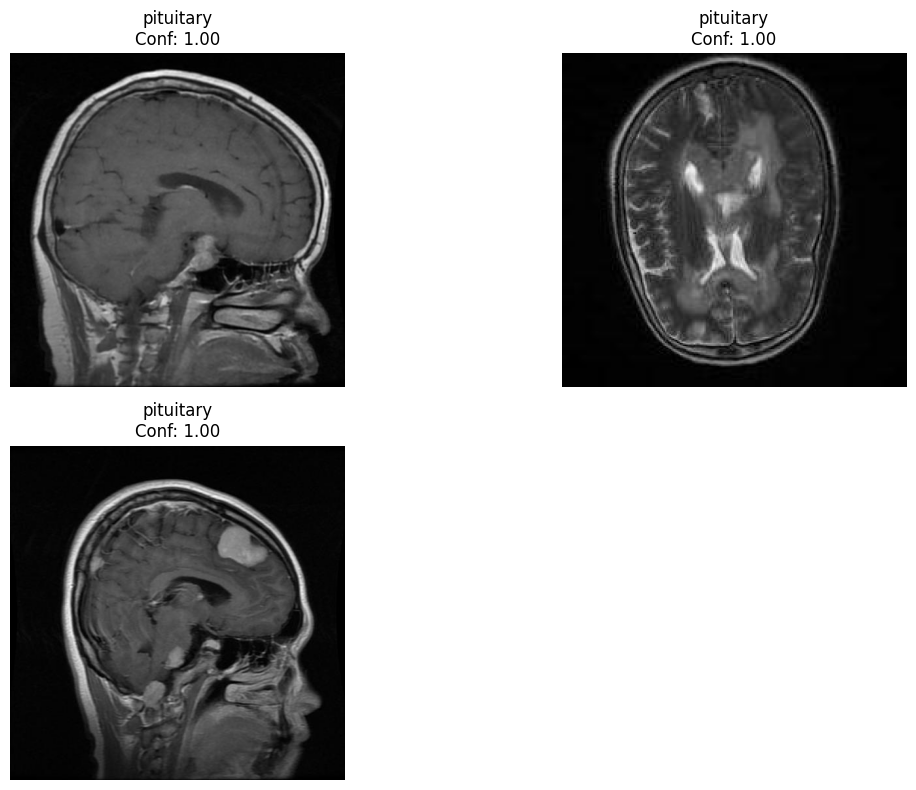

In [24]:
from google.colab import files
import numpy as np
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 150

# Upload images
uploaded = files.upload()

# Get class labels
class_indices = train_generator.class_indices
class_labels = dict((v,k) for k,v in class_indices.items())

plt.figure(figsize=(12,8))

for i, filename in enumerate(uploaded.keys()):

    # Read and preprocess image
    img = cv2.imread(filename)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
    img_normalized = img_resized / 255.0
    img_input = np.reshape(img_normalized, (1, IMG_SIZE, IMG_SIZE, 3))

    # Predict
    prediction = model.predict(img_input, verbose=0)
    predicted_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_index]
    confidence = np.max(prediction)

    # Plot image
    plt.subplot(2,2,i+1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"{predicted_class}\nConf: {confidence:.2f}")

plt.tight_layout()
plt.show()

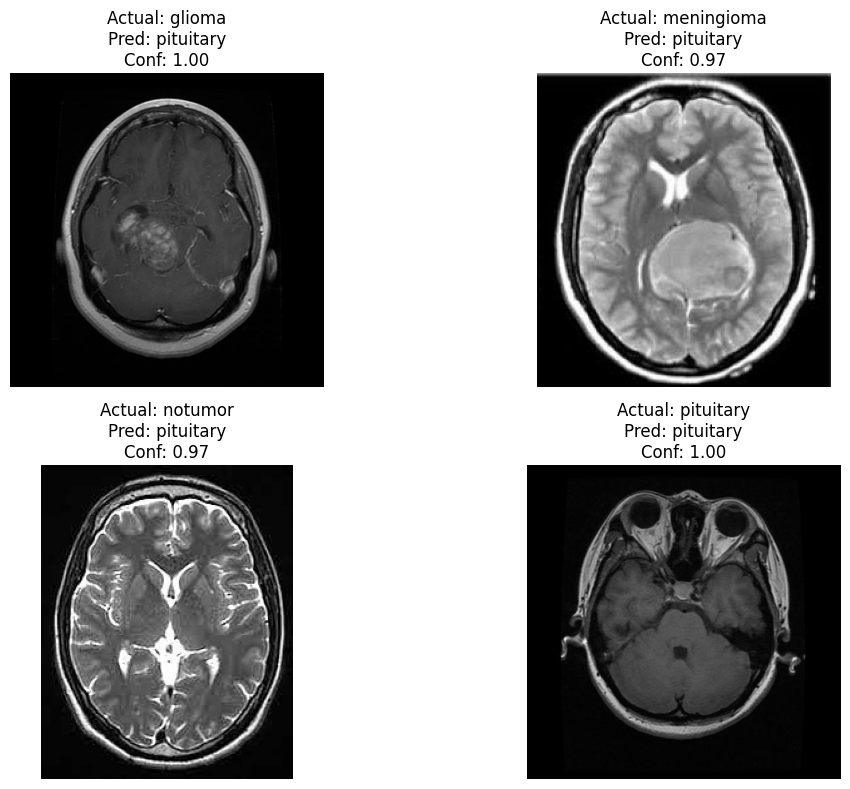

In [25]:
import os
import random

IMG_SIZE = 150

plt.figure(figsize=(12,8))

class_indices = train_generator.class_indices
class_labels = dict((v,k) for k,v in class_indices.items())

for i, class_name in enumerate(class_labels.values()):

    # Pick random image from each class
    class_folder = os.path.join(test_path, class_name)
    image_name = random.choice(os.listdir(class_folder))
    image_path = os.path.join(class_folder, image_name)

    # Load image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
    img_normalized = img_resized / 255.0
    img_input = np.reshape(img_normalized, (1, IMG_SIZE, IMG_SIZE, 3))

    # Predict
    prediction = model.predict(img_input, verbose=0)
    predicted_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_index]
    confidence = np.max(prediction)

    # Plot
    plt.subplot(2,2,i+1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Actual: {class_name}\nPred: {predicted_class}\nConf: {confidence:.2f}")

plt.tight_layout()
plt.show()

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
train_path = "/kaggle/input/brain-tumor-mri-dataset/Training"
test_path = "/kaggle/input/brain-tumor-mri-dataset/Testing"

classes = os.listdir(train_path)
print('Classes: ', classes)

Classes:  ['pituitary', 'notumor', 'meningioma', 'glioma']


In [28]:
data_info = []
for cls in classes:
    train_count = len(os.listdir(os.path.join(train_path, cls)))
    test_count = len(os.listdir(os.path.join(test_path, cls)))

    data_info.append([cls, train_count, test_count])

df = pd.DataFrame(data_info, columns=["Class", "Train Count", "Test Count"])
print(df)

        Class  Train Count  Test Count
0   pituitary         1457         300
1     notumor         1595         405
2  meningioma         1339         306
3      glioma         1321         300


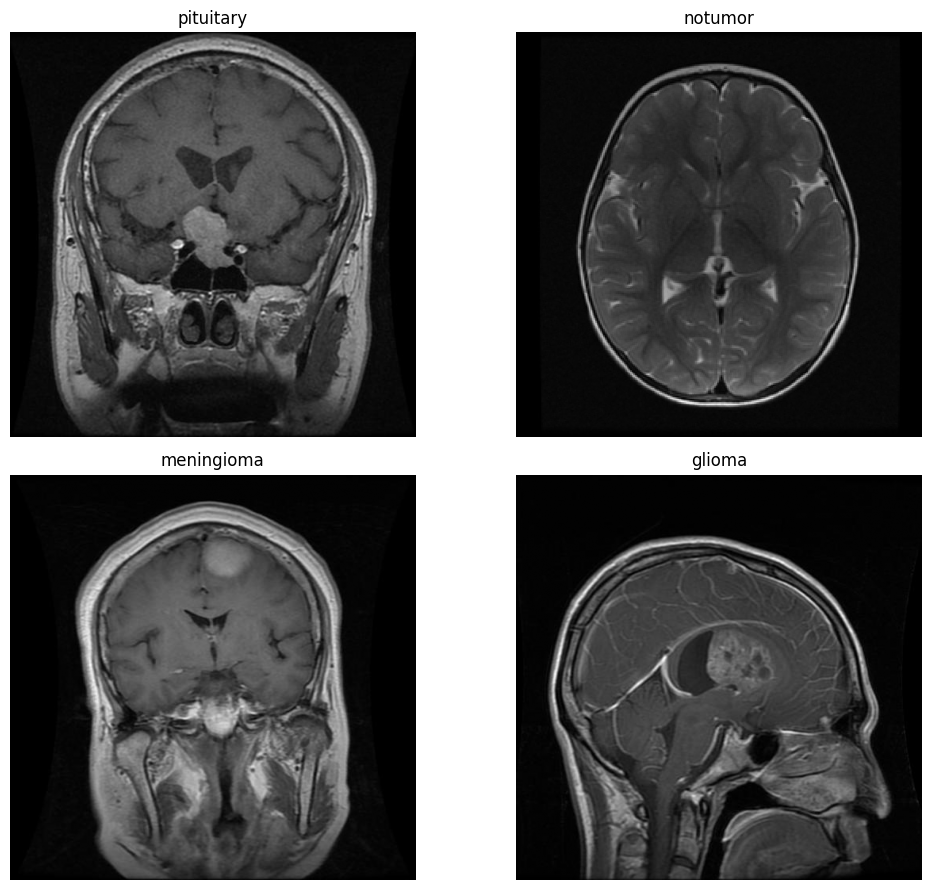

In [29]:
plt.figure(figsize=(11, 9))
for i, cls in enumerate(classes):
    img_path = os.path.join(train_path, cls, random.choice(os.listdir(os.path.join(train_path, cls))))
    img = cv2.imread(img_path, 0)

    plt.subplot(2, 2, i+1)
    plt.imshow(img, 'gray')
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()